In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

Text(0.5, 0, 'Sample')

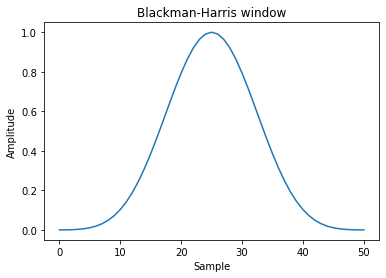

In [2]:
window = signal.windows.blackmanharris(51)
plt.plot(window)
plt.title("Blackman-Harris window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

Text(0.5, 0, 'Sample')

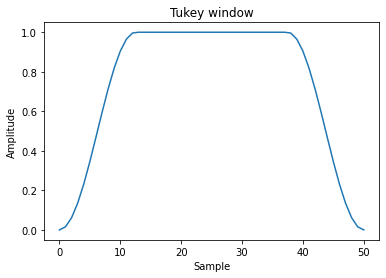

In [3]:
window = signal.windows.tukey(51)
plt.plot(window)
plt.title("Tukey window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

Text(0.5, 0, 'Sample')

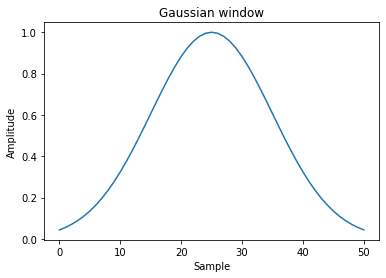

In [4]:
window = signal.windows.gaussian(51, 10)
plt.plot(window)
plt.title("Gaussian window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

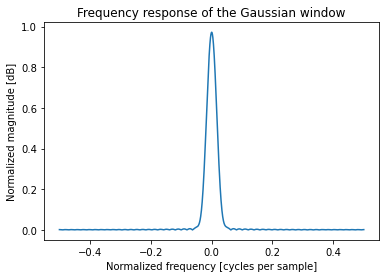

In [5]:
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
#response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, fftshift(np.abs(A)))
#plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Gaussian window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

In [6]:
Nfreqs = 384
channel_width = 80000.0

wedge_slope_factor_inner = 0.23
wedge_slope_factor_outer = 0.7
wedge_delay_buffer = 6.5e-8
wedge_variance_inner = 1084.9656666412166
wedge_variance_outer = 28.966173241799588
window_min_variance = 5.06396954e-01
window_exp_amp = 1.19213736e03
window_exp_width = 6.93325643e-08

c = 3e8

exp_function = (
    window_exp_amp * np.exp(-np.abs(delay_array) / window_exp_width / 2)
    + window_min_variance
)
exp_function[
    np.where(exp_function > wedge_variance_outer)[0]
] = wedge_variance_outer
weighting_func_delay_vals = np.repeat(
    exp_function[np.newaxis, :], len(bin_edges) - 1, axis=0
)

bl_lengths = np.array(
    [
        (bin_edges[bin_ind] + bin_edges[bin_ind + 1]) / 2.0
        for bin_ind in range(len(bin_edges) - 1)
    ]
)
for delay_ind, delay_val in enumerate(delay_array):
    wedge_bls_outer = np.where(
        wedge_slope_factor_outer * bl_lengths / c + wedge_delay_buffer
        > np.abs(delay_val)
    )[0]
    weighting_func_delay_vals[wedge_bls_outer, delay_ind] = wedge_variance_outer
    wedge_bls_inner = np.where(
        wedge_slope_factor_inner * bl_lengths / c + wedge_delay_buffer
        > np.abs(delay_val)
    )[0]
    weighting_func_delay_vals[wedge_bls_inner, delay_ind] = wedge_variance_inner

weighting_func_delay_vals *= (
    channel_width**2
)  # Make normalization conform with delay spectra


NameError: name 'delay_array' is not defined